**Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder , normalize , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error

**Read DataSet**

In [ ]:
df = pd.read_csv('/content/electric_v.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [ ]:
new_df = df.copy()

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [ ]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [ ]:
df.describe(include = 'object')

,brand,model,battery_type,fast_charge_port,cargo_volume_l,drivetrain,segment,car_body_type,source_url
count,478,477,478,477,477,478,478,478,478
unique,59,477,1,2,140,3,15,8,478
top,Mercedes-Benz,X Privilege AWD (MY25),Lithium-ion,CCS,520,AWD,JC - Medium,SUV,https://ev-database.org/car/3178/firefly-firefly
freq,42,1,478,476,17,191,91,244,1


In [ ]:
df['brand'].unique()

array(['Abarth', 'Aiways', 'Alfa', 'Alpine', 'Audi', 'BMW', 'BYD',
       'CUPRA', 'Cadillac', 'Citroen', 'DS', 'Dacia', 'Dongfeng',
       'Elaris', 'Fiat', 'Ford', 'GWM', 'Genesis', 'Honda', 'Hongqi',
       'Hyundai', 'Jaguar', 'Jeep', 'KGM', 'Kia', 'Lancia', 'Leapmotor',
       'Lexus', 'Lotus', 'Lucid', 'Lynk&Co', 'MG', 'Maserati', 'Maxus',
       'Mazda', 'Mercedes-Benz', 'Mini', 'NIO', 'Nissan', 'Omoda', 'Opel',
       'Peugeot', 'Polestar', 'Porsche', 'Renault', 'Rolls-Royce',
       'Skoda', 'Skywell', 'Smart', 'Subaru', 'Tesla', 'Toyota',
       'VinFast', 'Volkswagen', 'Volvo', 'Voyah', 'XPENG', 'Zeekr',
       'firefly'], dtype=object)

In [ ]:
df['car_body_type'].unique()

array(['Hatchback', 'SUV', 'Station/Estate', 'Liftback Sedan', 'Sedan',
       'Small Passenger Van', 'Cabriolet', 'Coupe'], dtype=object)

In [ ]:
df['drivetrain'].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols = [col for col in cat_cols if col != 'source_url']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

**Data Notes**

1.   Missing Values
2.   Outliers
3.   Object
4.   Normalization

**Data Cleaninig**

1.   Missing Values
2.   Outliers

**Missing Values**

**Cat_Cols**

In [ ]:
missing_cat = df[cat_cols].isnull().sum()
missing_cat[missing_cat>0]
missing_cat

,0
brand,0
model,1
battery_type,0
fast_charge_port,1
cargo_volume_l,1
drivetrain,0
segment,0
car_body_type,0


In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [ ]:
missing_cat = df[cat_cols].isnull().sum()
missing_cat[missing_cat==0]
missing_cat

,0
brand,0
model,0
battery_type,0
fast_charge_port,0
cargo_volume_l,0
drivetrain,0
segment,0
car_body_type,0


**Num_Cols**

In [ ]:
missing_num = df[num_cols].isnull().sum()
missing_num[missing_num>0]
missing_num

,0
top_speed_kmh,0
battery_capacity_kWh,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0
fast_charging_power_kw_dc,1
towing_capacity_kg,26
seats,0


In [ ]:
knn = KNNImputer()
knn_array = knn.fit_transform(df[num_cols])

In [ ]:
knn_array

array([[ 155. ,   37.8,  192. , ..., 3673. , 1683. , 1518. ],
       [ 155. ,   37.8,  192. , ..., 3673. , 1683. , 1518. ],
       [ 200. ,   50.8,  102. , ..., 4187. , 1779. , 1557. ],
       ...,
       [ 190. ,   65. ,  326.4, ..., 4432. , 1836. , 1566. ],
       [ 190. ,   65. ,  285.6, ..., 4432. , 1836. , 1566. ],
       [ 150. ,   41.2,  112. , ..., 4003. , 1885. , 1557. ]])

In [ ]:
new_df = pd.DataFrame(knn_array , columns=knn.feature_names_in_)
new_df.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
0,155.0,37.8,192.0,235.0,156.0,225.0,7.0,67.0,0.0,4.0,3673.0,1683.0,1518.0
1,155.0,37.8,192.0,235.0,149.0,225.0,7.0,67.0,0.0,4.0,3673.0,1683.0,1518.0
2,200.0,50.8,102.0,345.0,158.0,280.0,5.9,79.0,0.0,5.0,4187.0,1779.0,1557.0
3,200.0,50.8,102.0,345.0,158.0,280.0,6.2,79.0,0.0,5.0,4187.0,1779.0,1557.0
4,150.0,60.0,204.0,310.0,156.0,315.0,7.5,78.0,1150.0,5.0,4680.0,1865.0,1700.0


In [ ]:
new_df[cat_cols] = df[cat_cols]
new_df.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,...,width_mm,height_mm,brand,model,battery_type,fast_charge_port,cargo_volume_l,drivetrain,segment,car_body_type
0,155.0,37.8,192.0,235.0,156.0,225.0,7.0,67.0,0.0,4.0,...,1683.0,1518.0,Abarth,500e Convertible,Lithium-ion,CCS,185,FWD,B - Compact,Hatchback
1,155.0,37.8,192.0,235.0,149.0,225.0,7.0,67.0,0.0,4.0,...,1683.0,1518.0,Abarth,500e Hatchback,Lithium-ion,CCS,185,FWD,B - Compact,Hatchback
2,200.0,50.8,102.0,345.0,158.0,280.0,5.9,79.0,0.0,5.0,...,1779.0,1557.0,Abarth,600e Scorpionissima,Lithium-ion,CCS,360,FWD,JB - Compact,SUV
3,200.0,50.8,102.0,345.0,158.0,280.0,6.2,79.0,0.0,5.0,...,1779.0,1557.0,Abarth,600e Turismo,Lithium-ion,CCS,360,FWD,JB - Compact,SUV
4,150.0,60.0,204.0,310.0,156.0,315.0,7.5,78.0,1150.0,5.0,...,1865.0,1700.0,Aiways,U5,Lithium-ion,CCS,496,FWD,JC - Medium,SUV


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              478 non-null    float64
 1   battery_capacity_kWh       478 non-null    float64
 2   number_of_cells            478 non-null    float64
 3   torque_nm                  478 non-null    float64
 4   efficiency_wh_per_km       478 non-null    float64
 5   range_km                   478 non-null    float64
 6   acceleration_0_100_s       478 non-null    float64
 7   fast_charging_power_kw_dc  478 non-null    float64
 8   towing_capacity_kg         478 non-null    float64
 9   seats                      478 non-null    float64
 10  length_mm                  478 non-null    float64
 11  width_mm                   478 non-null    float64
 12  height_mm                  478 non-null    float64
 13  brand                      478 non-null    object 

**Outliers**

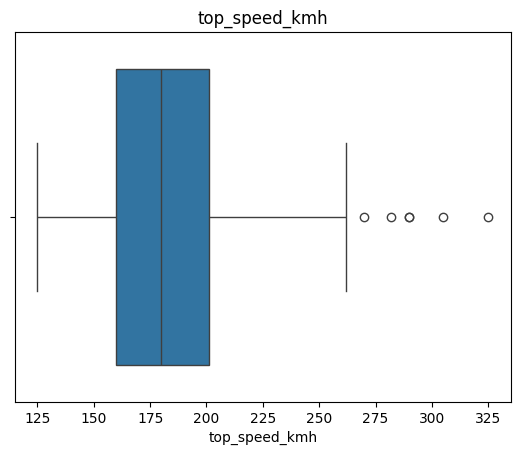

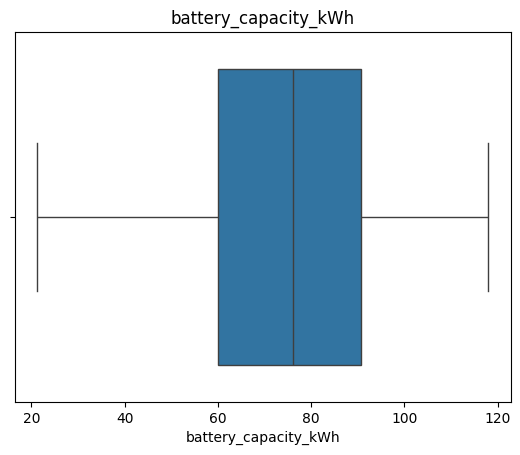

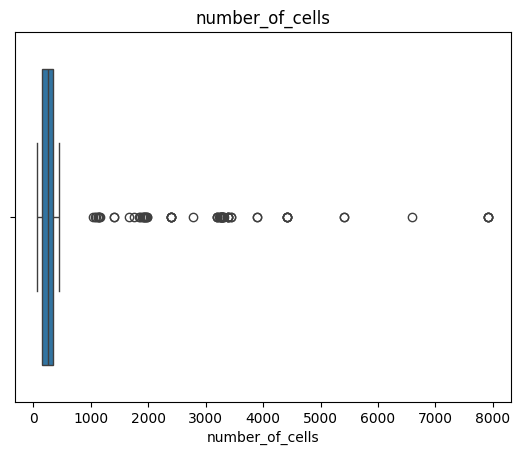

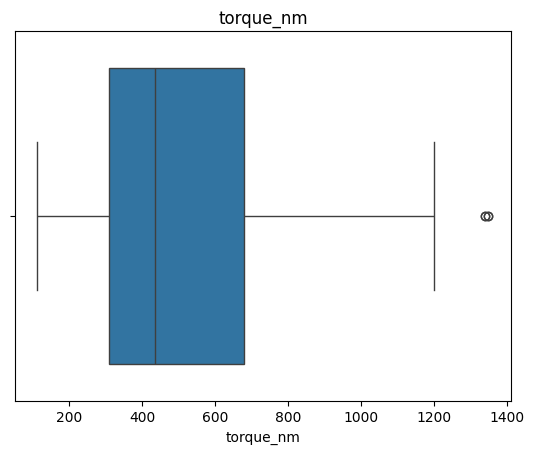

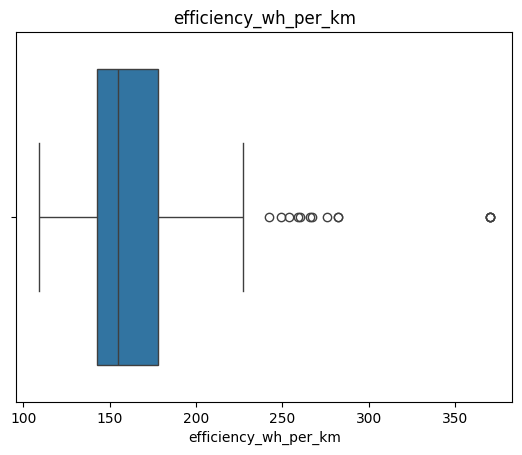

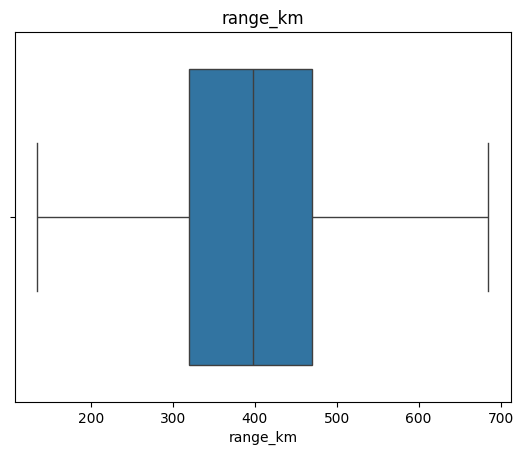

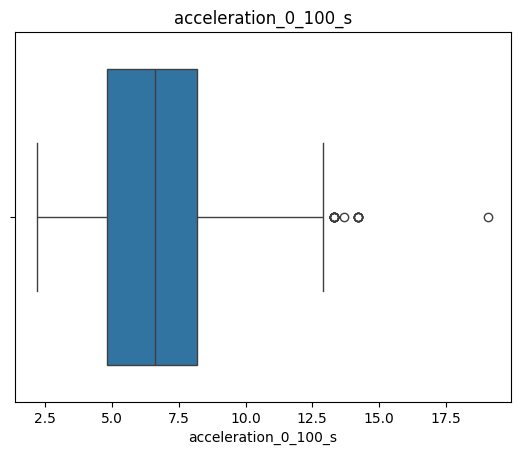

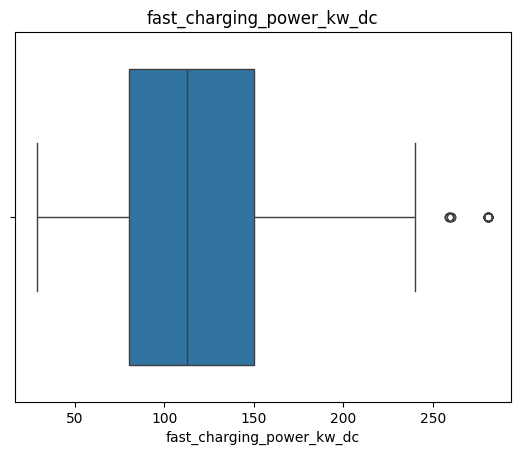

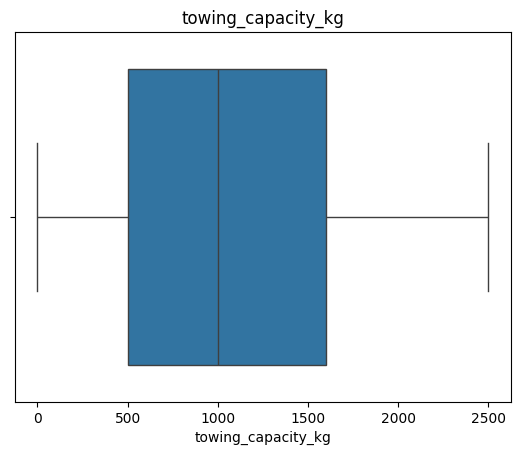

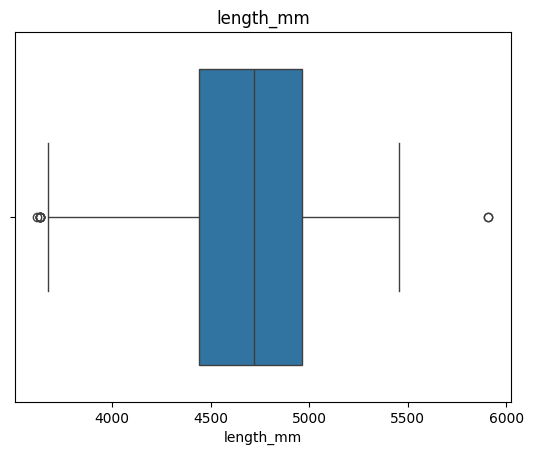

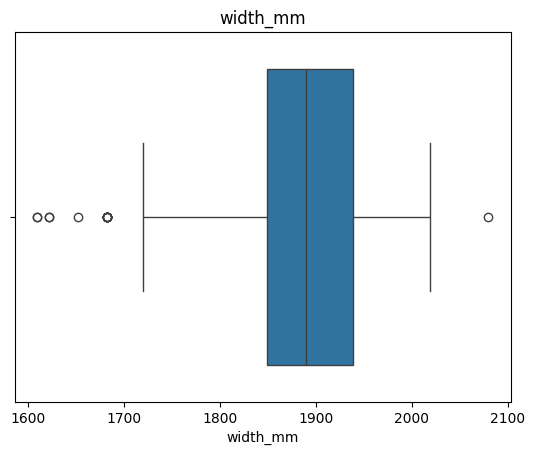

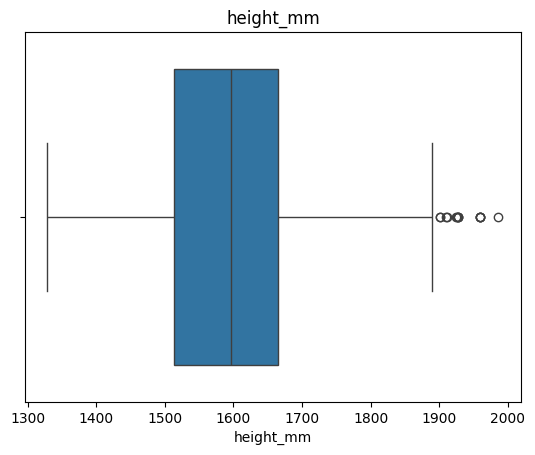

In [ ]:
for col in num_cols:
  if col != 'seats':
    fig , ax = plt.subplots()
    sns.boxplot(x = new_df[col])
    ax.set_title(col)
    plt.show()

In [ ]:
def remove_outliers_iqr(new_df, num_cols, factor=1.5):


    for col in num_cols:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        new_df = new_df[(new_df[col] >= lower) & (new_df[col] <= upper)]

    return new_df

In [ ]:
num_cols = new_df.select_dtypes(include='number').columns
new_df = remove_outliers_iqr(new_df, num_cols)

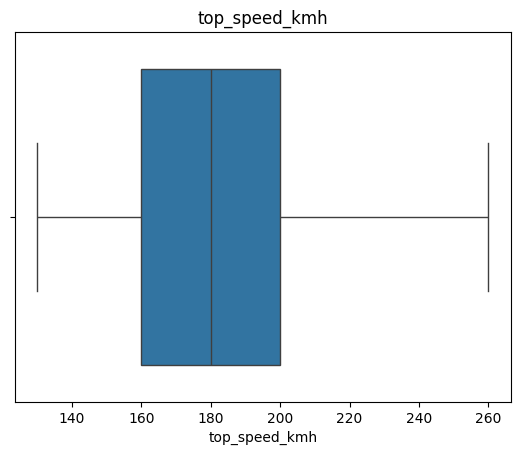

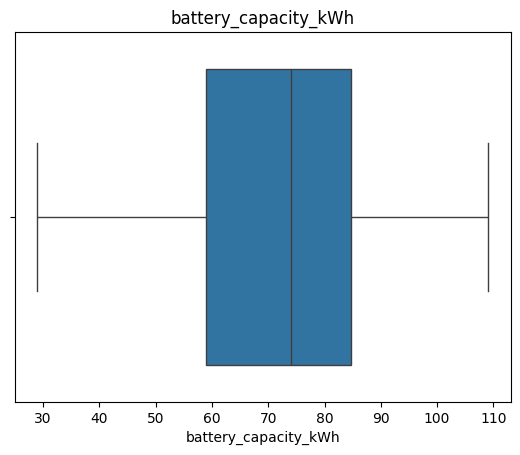

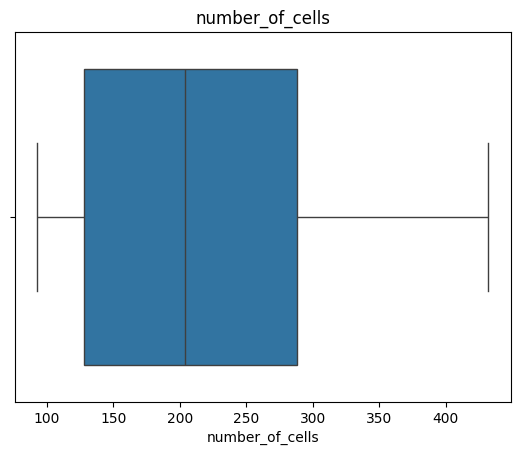

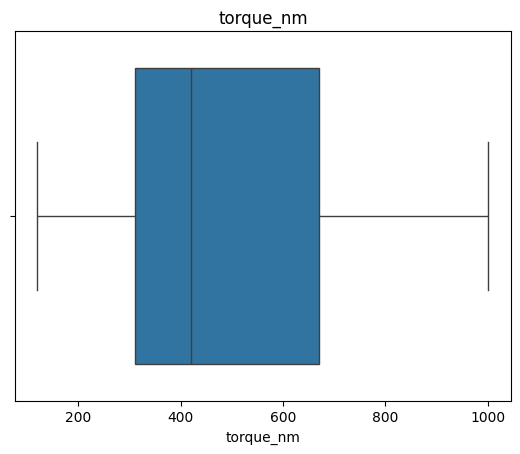

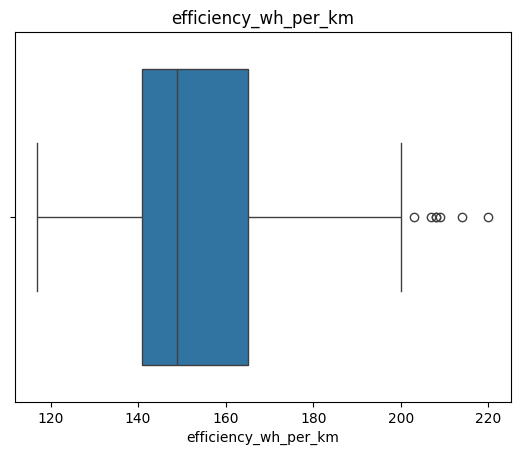

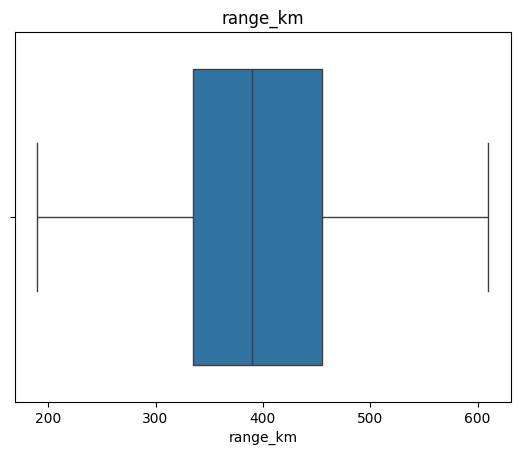

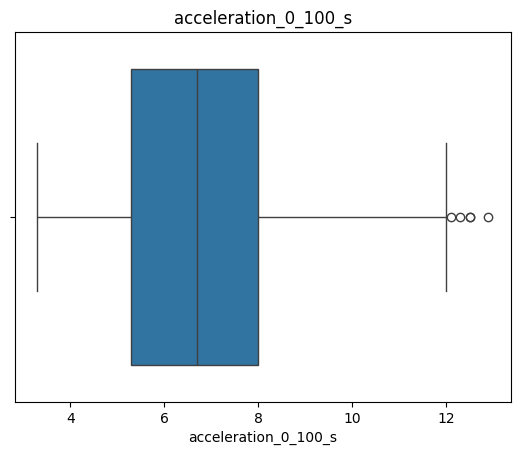

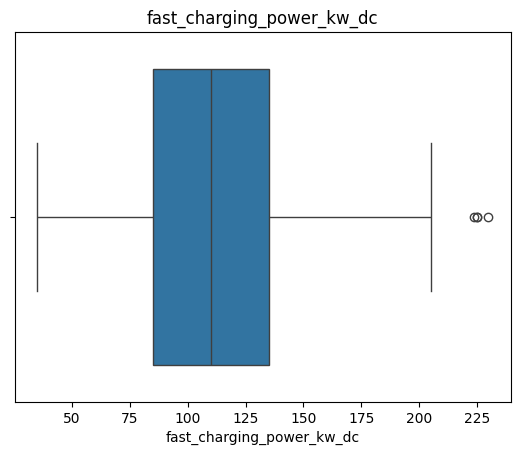

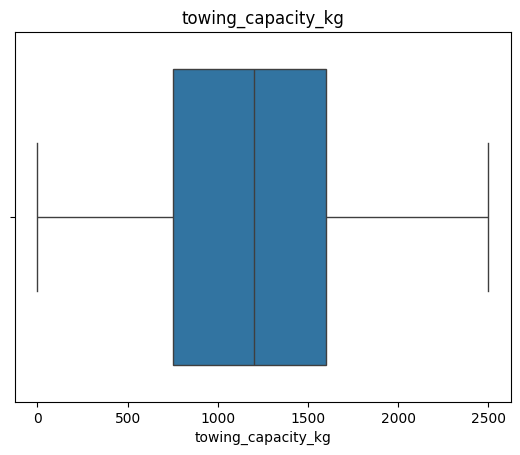

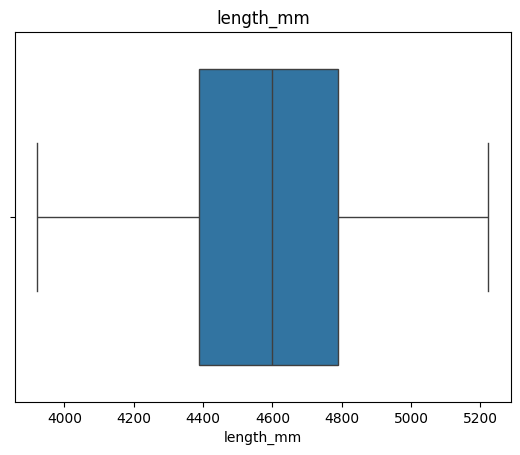

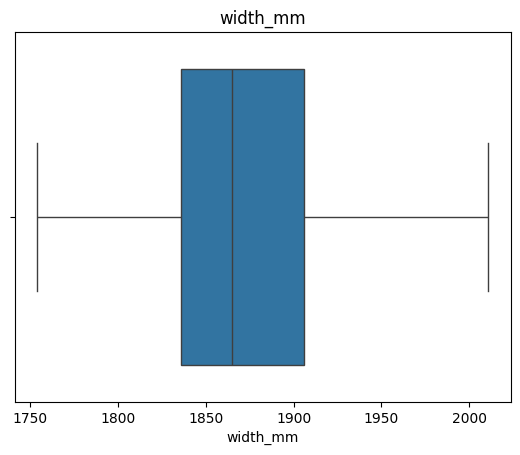

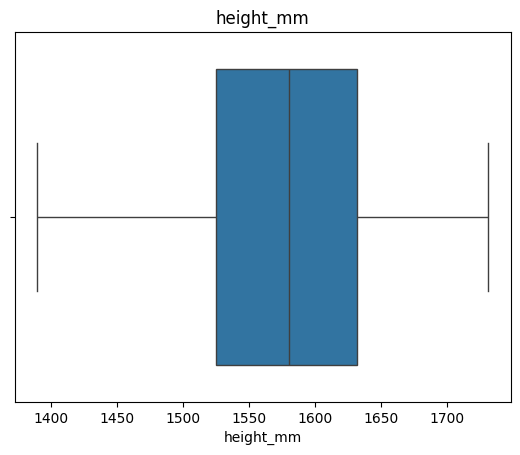

In [ ]:
for col in num_cols:
  if col != 'seats':
    fig , ax = plt.subplots()
    sns.boxplot(x = new_df[col])
    ax.set_title(col)
    plt.show()

**Data Processing**

**Object**

In [ ]:
new_df[cat_cols]

,brand,model,battery_type,fast_charge_port,cargo_volume_l,drivetrain,segment,car_body_type
2,Abarth,600e Scorpionissima,Lithium-ion,CCS,360,FWD,JB - Compact,SUV
3,Abarth,600e Turismo,Lithium-ion,CCS,360,FWD,JB - Compact,SUV
4,Aiways,U5,Lithium-ion,CCS,496,FWD,JC - Medium,SUV
5,Aiways,U6,Lithium-ion,CCS,472,FWD,JC - Medium,SUV
6,Alfa,Romeo Junior Elettrica 54 kWh,Lithium-ion,CCS,400,FWD,JB - Compact,SUV
...,...,...,...,...,...,...,...,...
470,Zeekr,001 Privilege AWD,Lithium-ion,CCS,539,AWD,E - Executive,Liftback Sedan
474,Zeekr,X Core RWD (MY25),Lithium-ion,CCS,362,RWD,JB - Compact,SUV
475,Zeekr,X Long Range RWD (MY25),Lithium-ion,CCS,362,RWD,JB - Compact,SUV
476,Zeekr,X Privilege AWD (MY25),Lithium-ion,CCS,362,AWD,JB - Compact,SUV


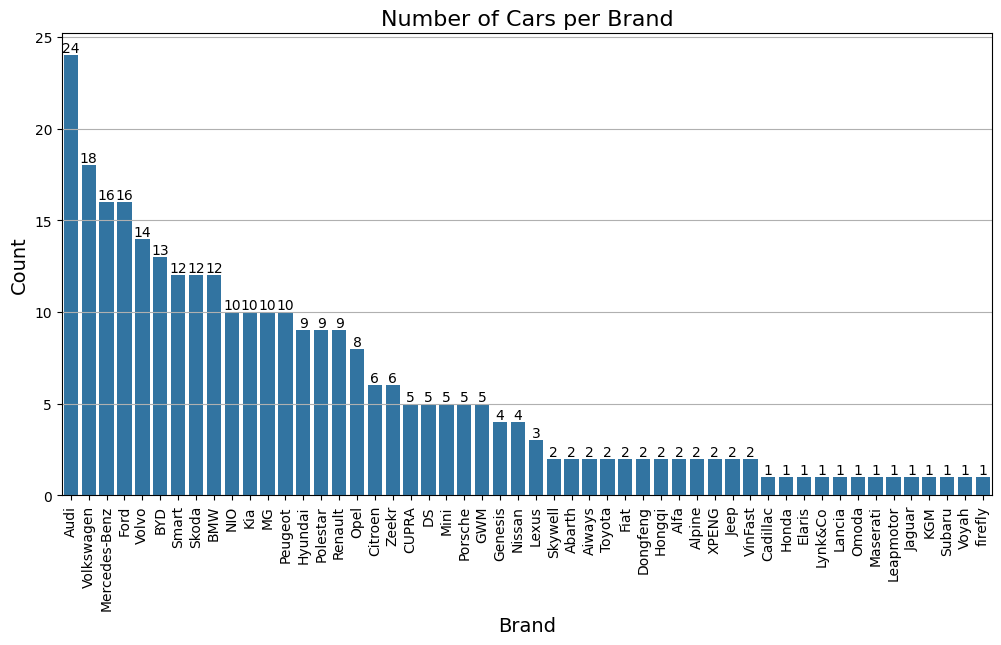

In [ ]:
brand_counts = new_df['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=brand_counts, x='brand', y='count')

plt.title('Number of Cars per Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')

for index, row in brand_counts.iterrows():
    plt.text(index, row['count'], row['count'], ha='center', va='bottom')

plt.show()

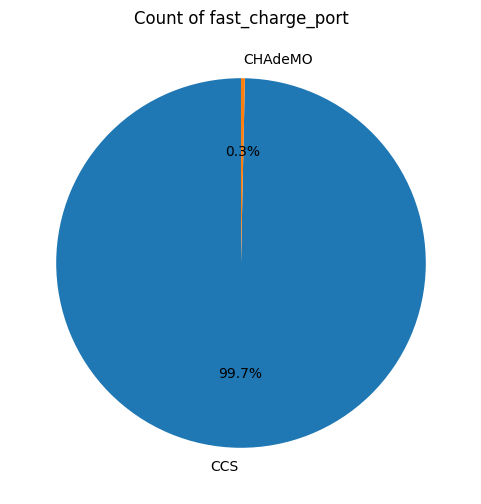

In [ ]:
fast_charge_counts = new_df['fast_charge_port'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fast_charge_counts, labels=fast_charge_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Count of fast_charge_port')
plt.show()


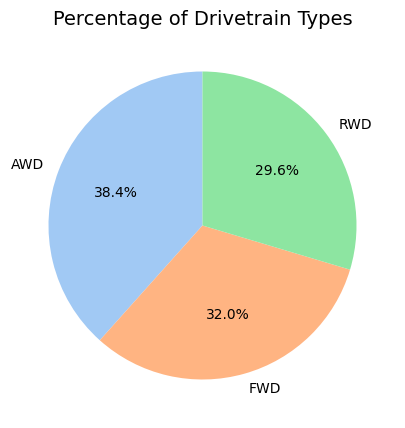

In [ ]:
drivetrain_counts = new_df['drivetrain'].value_counts()

colors = sns.color_palette('pastel', len(drivetrain_counts))

plt.figure(figsize=(7, 5))
plt.pie(
    drivetrain_counts,
    labels=drivetrain_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
plt.title('Percentage of Drivetrain Types', fontsize=14)
plt.show()


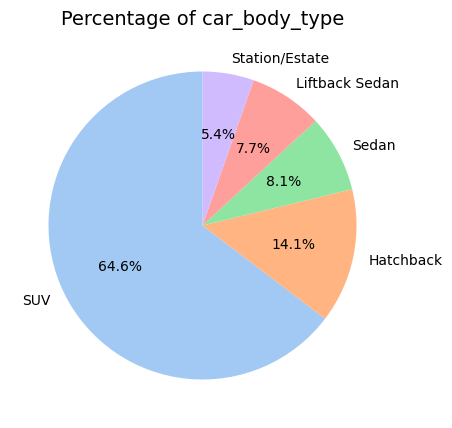

In [ ]:
car_body_counts = new_df['car_body_type'].value_counts()


colors = sns.color_palette('pastel', len(car_body_counts))


plt.figure(figsize=(7, 5))
plt.pie(
    car_body_counts,
    labels=car_body_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
plt.title('Percentage of car_body_type', fontsize=14)
plt.show()


**Notes**


*   Label Encoder : fast_charge_port , battery_type
*   OneHotEncoder :
brand , model , cargo_volume_l , drivetrain , segment , 	car_body_type



In [ ]:
label_cols = [col for col in cat_cols if col in ['battery_type', 'fast_charge_port']]
onehot_cols = [col for col in cat_cols if col not in ['battery_type', 'fast_charge_port']]

In [ ]:
la_df = new_df[label_cols]

In [ ]:
onehot_cols

['brand', 'model', 'cargo_volume_l', 'drivetrain', 'segment', 'car_body_type']

**Label Encoder**

In [ ]:
la = LabelEncoder()
for col in label_cols:
    la_df[col] = la.fit_transform(la_df[col])

/tmp/ipython-input-1816635719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_df[col] = la.fit_transform(la_df[col])
/tmp/ipython-input-1816635719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_df[col] = la.fit_transform(la_df[col])


In [ ]:
la_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 2 to 477
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   battery_type      297 non-null    int64
 1   fast_charge_port  297 non-null    int64
dtypes: int64(2)
memory usage: 7.0 KB


In [ ]:
new_df.drop(columns=['battery_type' , 'fast_charge_port'] , axis = 1 , inplace=True)

In [ ]:
new_df[label_cols] = la_df[label_cols]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 2 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              297 non-null    float64
 1   battery_capacity_kWh       297 non-null    float64
 2   number_of_cells            297 non-null    float64
 3   torque_nm                  297 non-null    float64
 4   efficiency_wh_per_km       297 non-null    float64
 5   range_km                   297 non-null    float64
 6   acceleration_0_100_s       297 non-null    float64
 7   fast_charging_power_kw_dc  297 non-null    float64
 8   towing_capacity_kg         297 non-null    float64
 9   seats                      297 non-null    float64
 10  length_mm                  297 non-null    float64
 11  width_mm                   297 non-null    float64
 12  height_mm                  297 non-null    float64
 13  brand                      297 non-null    object 
 14 

In [ ]:
new_df.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,...,width_mm,height_mm,brand,model,cargo_volume_l,drivetrain,segment,car_body_type,battery_type,fast_charge_port
2,200.0,50.8,102.0,345.0,158.0,280.0,5.9,79.0,0.0,5.0,...,1779.0,1557.0,Abarth,600e Scorpionissima,360,FWD,JB - Compact,SUV,0,0
3,200.0,50.8,102.0,345.0,158.0,280.0,6.2,79.0,0.0,5.0,...,1779.0,1557.0,Abarth,600e Turismo,360,FWD,JB - Compact,SUV,0,0
4,150.0,60.0,204.0,310.0,156.0,315.0,7.5,78.0,1150.0,5.0,...,1865.0,1700.0,Aiways,U5,496,FWD,JC - Medium,SUV,0,0
5,160.0,60.0,116.0,315.0,150.0,350.0,7.0,78.0,1272.0,5.0,...,1880.0,1641.0,Aiways,U6,472,FWD,JC - Medium,SUV,0,0
6,150.0,50.8,102.0,260.0,128.0,320.0,9.0,85.0,0.0,5.0,...,1781.0,1532.0,Alfa,Romeo Junior Elettrica 54 kWh,400,FWD,JB - Compact,SUV,0,0


**OneHotEncoder**

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_array = ohe.fit_transform(new_df[onehot_cols])

df
df_ohe = pd.DataFrame(
    ohe_array,
    columns=ohe.get_feature_names_out(onehot_cols),
    index=new_df.index
)


new_df = pd.concat(
    [
        new_df.drop(onehot_cols, axis=1),
        df_ohe
    ],
    axis=1
)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 2 to 477
Columns: 479 entries, top_speed_kmh to car_body_type_Station/Estate
dtypes: float64(477), int64(2)
memory usage: 1.1 MB


In [ ]:
new_df.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,...,segment_JB - Compact,segment_JC - Medium,segment_JD - Large,segment_JE - Executive,segment_JF - Luxury,car_body_type_Hatchback,car_body_type_Liftback Sedan,car_body_type_SUV,car_body_type_Sedan,car_body_type_Station/Estate
2,200.0,50.8,102.0,345.0,158.0,280.0,5.9,79.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,200.0,50.8,102.0,345.0,158.0,280.0,6.2,79.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,150.0,60.0,204.0,310.0,156.0,315.0,7.5,78.0,1150.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,160.0,60.0,116.0,315.0,150.0,350.0,7.0,78.0,1272.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,150.0,50.8,102.0,260.0,128.0,320.0,9.0,85.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
new_df.isnull().sum()

,0
top_speed_kmh,0
battery_capacity_kWh,0
number_of_cells,0
torque_nm,0
efficiency_wh_per_km,0
...,...
car_body_type_Hatchback,0
car_body_type_Liftback Sedan,0
car_body_type_SUV,0
car_body_type_Sedan,0


In [ ]:
corr_matrix = new_df.corr()

target_corr = corr_matrix['range_km'].sort_values(ascending=False)
print(target_corr)

range_km                     1.000000
battery_capacity_kWh         0.911493
fast_charging_power_kw_dc    0.726453
length_mm                    0.709276
torque_nm                    0.647327
                               ...   
segment_JB - Compact        -0.445915
drivetrain_FWD              -0.519506
acceleration_0_100_s        -0.545426
seats                             NaN
battery_type                      NaN
Name: range_km, Length: 479, dtype: float64


**Normalization**

In [ ]:
num_cols = new_df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
scaler = MinMaxScaler()

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [ ]:
new_df.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,...,segment_JB - Compact,segment_JC - Medium,segment_JD - Large,segment_JE - Executive,segment_JF - Luxury,car_body_type_Hatchback,car_body_type_Liftback Sedan,car_body_type_SUV,car_body_type_Sedan,car_body_type_Station/Estate
2,0.538462,0.272160,0.026549,0.255392,0.398058,0.214286,0.270833,0.225641,0.0000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.538462,0.272160,0.026549,0.255392,0.398058,0.214286,0.302083,0.225641,0.0000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.153846,0.387016,0.327434,0.215664,0.378641,0.297619,0.437500,0.220513,0.4600,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.230769,0.387016,0.067847,0.221339,0.320388,0.380952,0.385417,0.220513,0.5088,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.153846,0.272160,0.026549,0.158910,0.106796,0.309524,0.593750,0.256410,0.0000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Data Spiliting**

In [ ]:
x = new_df.drop('range_km' , axis= 1)
y = new_df['range_km']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , shuffle=True )

**Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
LR = LinearRegression()
KNN = KNeighborsRegressor()
PY = PolynomialFeatures(degree=2)
LR_poly = LinearRegression()


In [ ]:
LR.fit(x_train, y_train)
KNN.fit(x_train, y_train)
LR_poly.fit(PY.fit_transform(x_train), y_train)

LinearRegression()

**Train Score**

In [ ]:
print(f'LinearRegression score is : {LR.score(x_train, y_train)}')
print(f'KNeighborsRegression score is : {KNN.score(x_train, y_train)}')
print(f'PolynomialRegression score is : {LR_poly.score(PY.fit_transform(x_train), y_train)}')

LinearRegression score is : 1.0
KNeighborsRegression score is : 0.8004402111772091
PolynomialRegression score is : 1.0


**Test Score**

In [ ]:
print(f'LinearRegression score is : {LR.score(x_test, y_test)}')
print(f'KNeighborsRegession score is : {KNN.score(x_test, y_test)}')
print(f'PolynomialRegression score is : {LR_poly.score(PY.fit_transform(x_test), y_test)}')

LinearRegression score is : 0.9279359635037979
KNeighborsRegession score is : 0.6862016244206322
PolynomialRegression score is : 0.8924341151918845


**Fine Tuning**

In [ ]:
train_acc = []
test_acc = []

for k in range(1,11):
    # build model
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train , y_train)
    train_acc.append(knn.score(x_train , y_train))
    test_acc.append(knn.score(x_test , y_test))

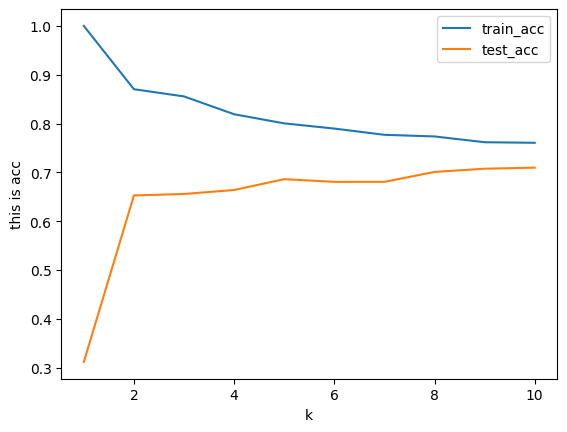

In [ ]:
plt.plot(range(1,11), train_acc ,label='train_acc' )
plt.plot(range(1,11), test_acc ,label='test_acc' )
plt.xlabel('k')
plt.ylabel('this is acc')
plt.legend()
plt.show()

In [ ]:
# KNN Regression Tuning

knn = KNeighborsRegressor()

param = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(knn, param, cv=5)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsRegressor(n_neighbors = 7, p = 1 , weights = 'uniform')
knn.fit(x_train , y_train)
knn.score(x_train , y_train)

0.7841323627147898

In [ ]:
knn.score(x_test , y_test)

0.7042621864180296

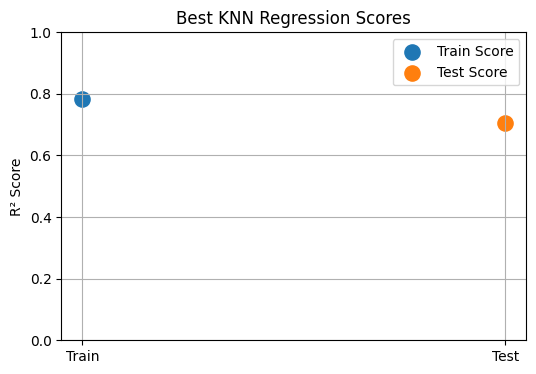

In [ ]:
train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

plt.figure(figsize=(6,4))

plt.scatter([1], [train_score], s=120, label='Train Score')
plt.scatter([2], [test_score], s=120, label='Test Score')

plt.xticks([1, 2], ['Train', 'Test'])
plt.ylabel('R² Score')
plt.title('Best KNN Regression Scores')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)

plt.show()

**Evaluating**

In [ ]:
# Linear Regrssion

LR = LinearRegression()
LR.fit(x_train, y_train)

y_pred_LR = LR.predict(x_test)

mse_LR = mean_squared_error(y_test, y_pred_LR)
print("Linear Regression MSE:", mse_LR)

Linear Regression MSE: 0.002486737619779602


In [ ]:
# KNN Regrssion

knn = KNeighborsRegressor(n_neighbors=7, p=1, weights='uniform')
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Regression MSE:", mse_knn)

KNN Regression MSE: 0.01020512286547272


In [ ]:
# Polynomial
LR_poly = LinearRegression()
LR_poly.fit(PY.fit_transform(x_train), y_train)

y_pred_poly = LR_poly.predict(PY.fit_transform(x_test))

mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)


Polynomial Regression MSE: 0.0037118116797595292


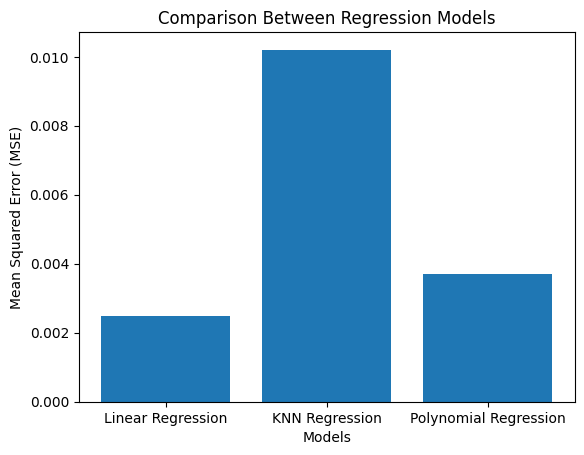

In [ ]:
models = ['Linear Regression', 'KNN Regression', 'Polynomial Regression']
mse_values = [mse_LR, mse_knn, mse_poly]

plt.figure()
plt.bar(models, mse_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison Between Regression Models')
plt.show()